In [1]:
import pandas as pd
import numpy as np

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font="NanumGothic")

In [3]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [4]:
train

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book
...,...,...,...,...,...,...,...,...,...,...
871388,TRAIN_871388,USER_92096,BOOK_081138,0,34.0,"minneapolis, minnesota, usa",Healing Words: The Power of Prayer and the Pra...,Larry Dossey,1993.0,Harpercollins
871389,TRAIN_871389,USER_92097,BOOK_258124,0,35.0,"temple, texas, usa",The Salmon of Doubt: Hitchhiking the Galaxy On...,DOUGLAS ADAMS,2002.0,Harmony
871390,TRAIN_871390,USER_92098,BOOK_071848,0,45.0,"ottawa, ontario, canada",Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2000.0,Thorndike Press
871391,TRAIN_871391,USER_92099,BOOK_252599,8,43.0,"maple grove, minnesota, usa",Heartbreak Hill: Anatomy of a Ryder Cup,Tim Rosaforte,1996.0,St Martins Pr


In [5]:
duplicate_user_ids = train.duplicated(subset='User-ID')
has_duplicates = duplicate_user_ids.any()
print(f"User-ID 열에서 중복 값이 있는지: {has_duplicates}")

User-ID 열에서 중복 값이 있는지: True


In [6]:
location_split = train['Location'].str.split(',', expand=True).apply(lambda x: x.str.strip())
location_split = location_split.iloc[:, :3]
train[['city', 'state', 'country']]=location_split

In [7]:
train.loc[train['country'].str.contains('n/a|N/A'), 'country'] = 'n/a'
train['country'].fillna('n/a', inplace=True)
train['country'].replace('', 'n/a', inplace=True)

train.loc[train['state'].str.contains('n/a|N/A'), 'state'] = 'n/a'
train['state'].fillna('n/a', inplace=True)
train['state'].replace('', 'n/a', inplace=True)

train.loc[train['city'].str.contains('n/a|N/A'), 'city'] = 'n/a'
train['city'].fillna('n/a', inplace=True)
train['city'].replace('', 'n/a', inplace=True)

train.drop('Location',axis=1,inplace=True)
train.drop('ID',axis=1,inplace=True)

In [8]:
train.isnull().sum()

User-ID                0
Book-ID                0
Book-Rating            0
Age                    0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
city                   0
state                  0
country                0
dtype: int64

In [9]:
train['Book-Rating'].value_counts()

0     548804
8      76971
10     60024
7      55852
9      50494
5      38416
6      26670
4       6462
3       4374
2       2019
1       1307
Name: Book-Rating, dtype: int64

In [10]:
train['Book-Rating'].mean()

2.8205792334801862

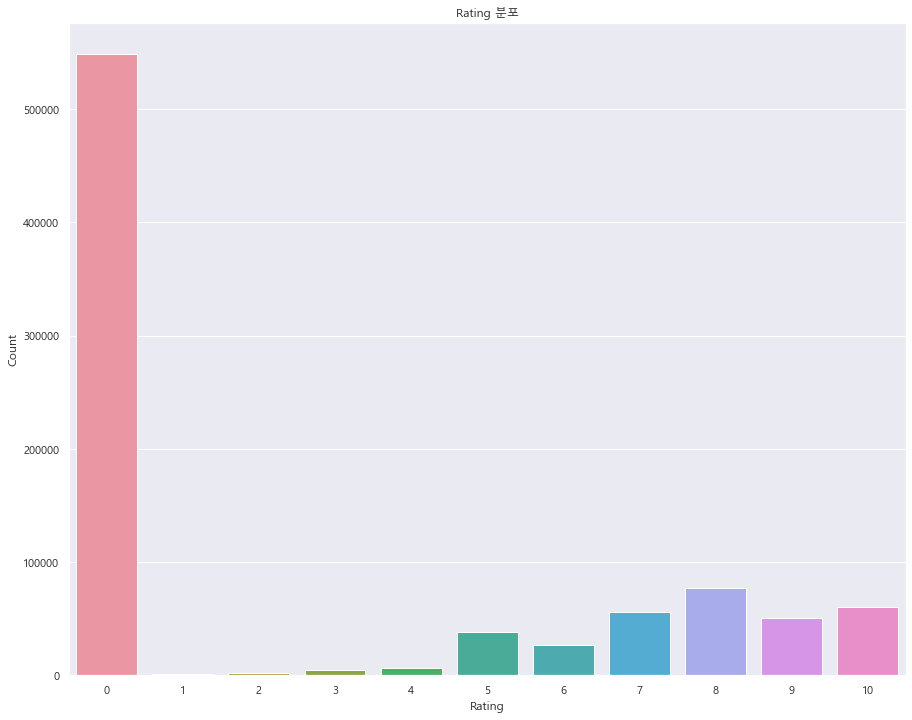

In [11]:
ds = train['Book-Rating'].value_counts().reset_index()

ds.columns = ['value', 'count']

fig, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x='value', y='count', data=ds, ax=ax)
ax.set_title('Rating 분포')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
plt.show()

In [12]:
train['Age'].value_counts()

35.0     251455
33.0      27349
29.0      25456
30.0      23085
31.0      22515
          ...  
118.0         1
109.0         1
147.0         1
123.0         1
132.0         1
Name: Age, Length: 137, dtype: int64

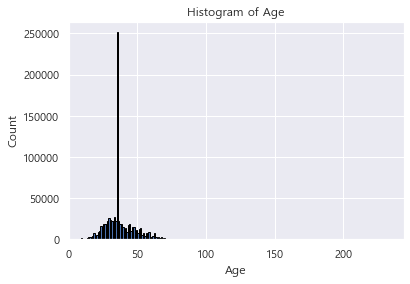

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Age 열의 분포를 확인
train['Age'].plot(kind='hist', bins=np.arange(0, train['Age'].max()+1, 1), ec='black')
plt.xlim([0, train['Age'].max()])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.show()



Age와 Book-Rating의 Pearson 상관 계수: -0.031


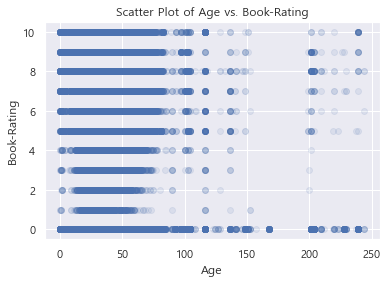

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Age와 Book-Rating 간의 상관관계를 계산
correlation = train['Age'].corr(train['Book-Rating'])

print(f"Age와 Book-Rating의 Pearson 상관 계수: {correlation:.3f}")

# 산점도 그리기
plt.scatter(train['Age'], train['Book-Rating'], alpha=0.1)
plt.xlabel('Age')
plt.ylabel('Book-Rating')
plt.title('Scatter Plot of Age vs. Book-Rating')
plt.show()

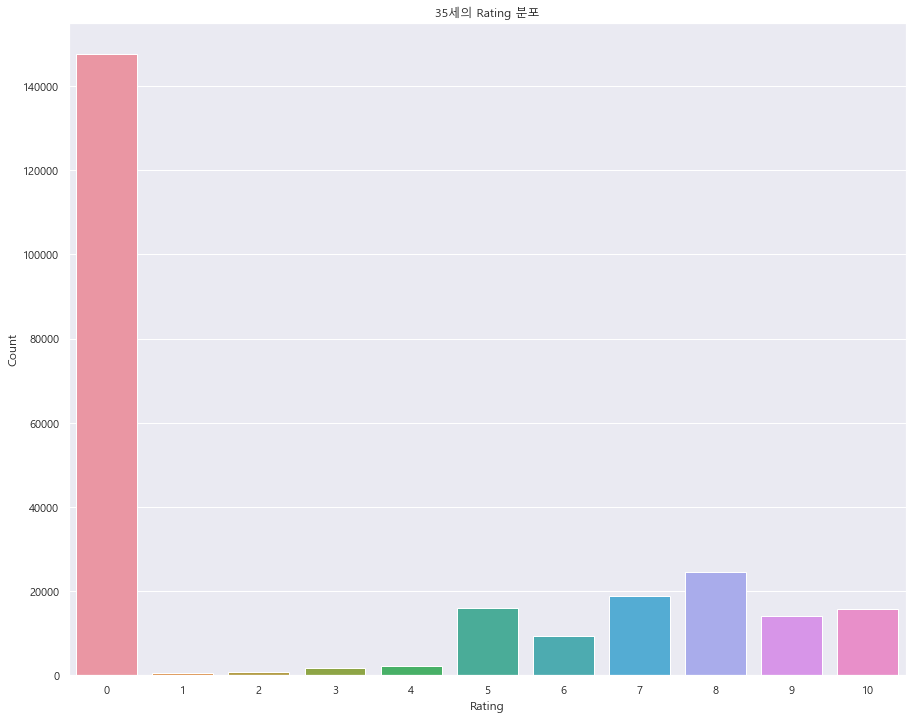

In [15]:
# 나이가 35살인 데이터만 추출
ds = train[train['Age']==35]['Book-Rating'].value_counts().reset_index()

ds.columns = ['value', 'count']


# 도서 평점 분포 그래프 생성
fig, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x='value', y='count', data=ds, ax=ax)
ax.set_title('35세의 Rating 분포')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
plt.show()

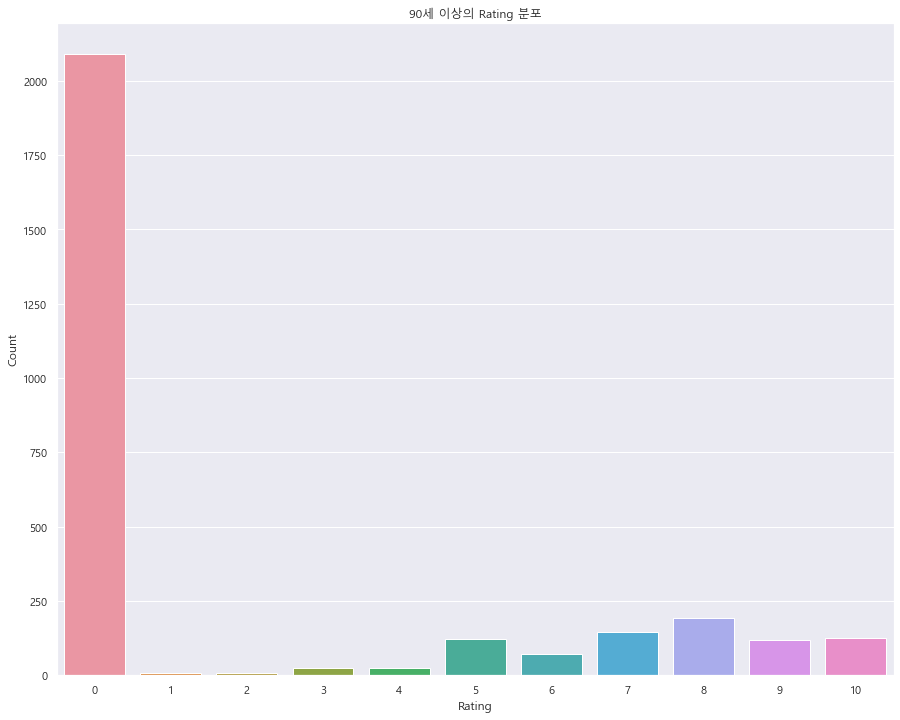

In [16]:
# 나이가 90살 이상인 데이터만 추출
ds = train[train['Age']>=90]['Book-Rating'].value_counts().reset_index()

ds.columns = ['value', 'count']


# 도서 평점 분포 그래프 생성
fig, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x='value', y='count', data=ds, ax=ax)
ax.set_title('90세 이상의 Rating 분포')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
plt.show()

In [17]:
train['Book-Author'].value_counts()

Stephen King           8467
Nora Roberts           6934
John Grisham           5283
James Patterson        5020
Mary Higgins Clark     3983
                       ... 
Cyrinda Foxe-Tyler        1
Matt Bloom                1
Cassie Kendall            1
Birney, M.D. Dibble       1
Stephen Griffith          1
Name: Book-Author, Length: 92635, dtype: int64

The top 10 most frequent books are:
Stephen King          8467
Nora Roberts          6934
John Grisham          5283
James Patterson       5020
Mary Higgins Clark    3983
Dean R. Koontz        3615
Tom Clancy            3373
Danielle Steel        3165
Sue Grafton           3011
Janet Evanovich       2969
Name: Book-Author, dtype: int64


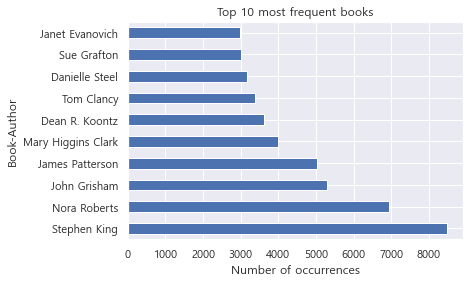

In [18]:
# Book-Author 컬럼에서 가장 많은 상위 10개 책 찾기
top_n_books = 10
top_books = train['Book-Author'].value_counts().head(top_n_books)

# 결과 출력
print(f'The top {top_n_books} most frequent books are:\n{top_books}')

# 결과 시각화
top_books.plot(kind='barh', title=f'Top {top_n_books} most frequent books')
plt.xlabel('Number of occurrences')
plt.ylabel('Book-Author')
plt.show()

The average rating of the top 10 books are:
Stephen King          3.587575
Nora Roberts          2.619123
John Grisham          3.195533
James Patterson       3.135060
Mary Higgins Clark    2.597540
Dean R. Koontz        2.559889
Tom Clancy            2.191521
Danielle Steel        2.071090
Sue Grafton           2.740950
Janet Evanovich       3.514988
Name: Book-Rating, dtype: float64


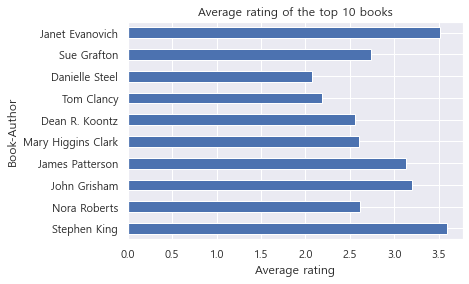

In [19]:
# Book-Title 컬럼에서 가장 많이 나온 상위 10개 책 찾기
top_n_books = 10
top_books = train['Book-Author'].value_counts().head(top_n_books)

# 각 책의 평균 평점 계산하기
book_ratings = train.groupby('Book-Author')['Book-Rating'].mean().loc[top_books.index]

# 결과 출력
print(f'The average rating of the top {top_n_books} books are:\n{book_ratings}')

# 결과 시각화
book_ratings.plot(kind='barh', title=f'Average rating of the top {top_n_books} books')
plt.xlabel('Average rating')
plt.ylabel('Book-Author')
plt.show()

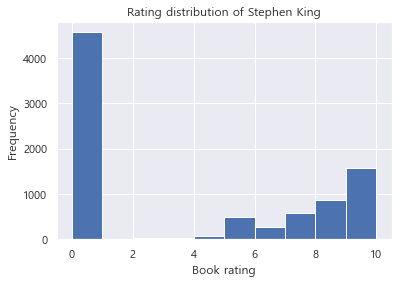

In [20]:
# 책 제목이 Stephen King인 도서의 레코드 찾기
wild_animus_records = train.loc[train['Book-Author'] == 'Stephen King']

# 평점 분포 확인
wild_animus_records['Book-Rating'].plot(kind='hist', title='Rating distribution of Stephen King')
plt.xlabel('Book rating')
plt.show()

In [21]:
train['Book-Title'].value_counts()

Wild Animus                                                                        2502
The Da Vinci Code                                                                   895
The Nanny Diaries: A Novel                                                          828
The Lovely Bones: A Novel                                                           768
A Painted House                                                                     761
                                                                                   ... 
Das Gesetz der Liebe. Inkl. CD.                                                       1
E- Mail an alle.                                                                      1
Enc/Brown/Saves/#7 (Encyclopedia Brown (Paperback))                                   1
Sitting Pretty                                                                        1
Creme De Colorado Cookbook (Celebrating Twenty Five Years of Culinary Artistry)       1
Name: Book-Title, Length: 217829

The top 10 most frequent books are:
Wild Animus                                        2502
The Da Vinci Code                                   895
The Nanny Diaries: A Novel                          828
The Lovely Bones: A Novel                           768
A Painted House                                     761
Divine Secrets of the Ya-Ya Sisterhood: A Novel     740
The Red Tent (Bestselling Backlist)                 723
The Secret Life of Bees                             708
Angels &amp; Demons                                 669
Bridget Jones's Diary                               666
Name: Book-Title, dtype: int64


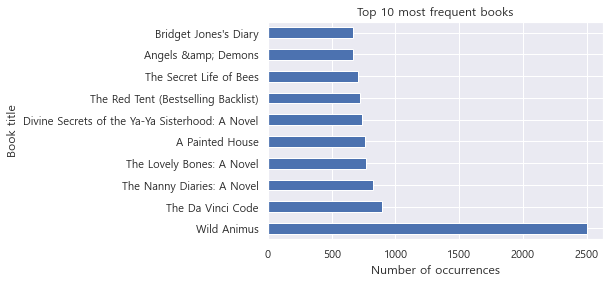

In [22]:
# Book-Title 컬럼에서 가장 많은 상위 10개 책 찾기
top_n_books = 10
top_books = train['Book-Title'].value_counts().head(top_n_books)

# 결과 출력
print(f'The top {top_n_books} most frequent books are:\n{top_books}')

# 결과 시각화
top_books.plot(kind='barh', title=f'Top {top_n_books} most frequent books')
plt.xlabel('Number of occurrences')
plt.ylabel('Book title')
plt.show()

The average rating of the top 10 books are:
Wild Animus                                        1.019584
The Da Vinci Code                                  4.650279
The Nanny Diaries: A Novel                         3.530193
The Lovely Bones: A Novel                          4.378906
A Painted House                                    3.241787
Divine Secrets of the Ya-Ya Sisterhood: A Novel    3.437838
The Red Tent (Bestselling Backlist)                4.334716
The Secret Life of Bees                            4.348870
Angels &amp; Demons                                3.704036
Bridget Jones's Diary                              3.498498
Name: Book-Rating, dtype: float64


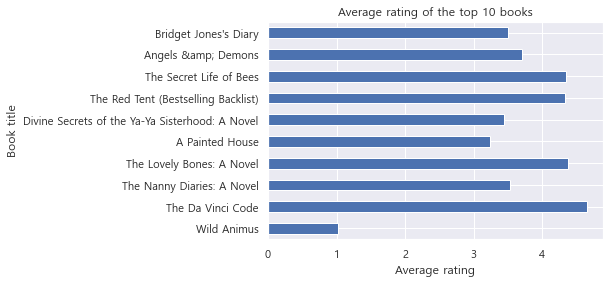

In [23]:
# Book-Title 컬럼에서 가장 많이 나온 상위 10개 책 찾기
top_n_books = 10
top_books = train['Book-Title'].value_counts().head(top_n_books)

# 각 책의 평균 평점 계산하기
book_ratings = train.groupby('Book-Title')['Book-Rating'].mean().loc[top_books.index]

# 결과 출력
print(f'The average rating of the top {top_n_books} books are:\n{book_ratings}')

# 결과 시각화
book_ratings.plot(kind='barh', title=f'Average rating of the top {top_n_books} books')
plt.xlabel('Average rating')
plt.ylabel('Book title')
plt.show()

The average rating of the top 10 books are:
Wild Animus                                         4.751715
The Da Vinci Code                                  19.173979
The Nanny Diaries: A Novel                         15.233670
The Lovely Bones: A Novel                          17.620259
A Painted House                                    14.975673
Divine Secrets of the Ya-Ya Sisterhood: A Novel    16.444033
The Red Tent (Bestselling Backlist)                18.222990
The Secret Life of Bees                            18.996929
Angels &amp; Demons                                17.253591
Bridget Jones's Diary                              15.970674
Name: Book-Rating, dtype: float64


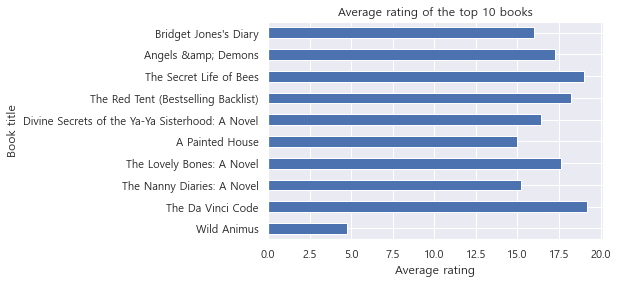

In [24]:
# Book-Title 컬럼에서 가장 많이 나온 상위 10개 책 찾기
top_n_books = 10
top_books = train['Book-Title'].value_counts().head(top_n_books)

# 각 책의 평균 평점 계산하기
book_ratings = train.groupby('Book-Title')['Book-Rating'].var().loc[top_books.index]

# 결과 출력
print(f'The average rating of the top {top_n_books} books are:\n{book_ratings}')

# 결과 시각화
book_ratings.plot(kind='barh', title=f'Average rating of the top {top_n_books} books')
plt.xlabel('Average rating')
plt.ylabel('Book title')
plt.show()

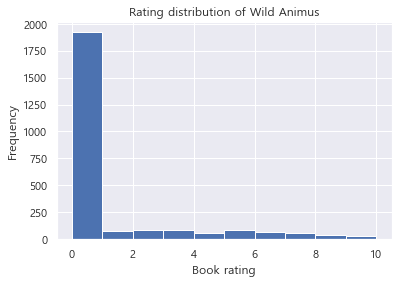

In [25]:
# 책 제목이 Wild Animus인 도서의 레코드 찾기
wild_animus_records = train.loc[train['Book-Title'] == 'Wild Animus']

# 평점 분포 확인
wild_animus_records['Book-Rating'].plot(kind='hist', title='Rating distribution of Wild Animus')
plt.xlabel('Book rating')
plt.show()

The average rating of the top 10 books are:
Ballantine Books            2.792901
Pocket                      2.474938
Berkley Publishing Group    2.387322
Harlequin                   1.389336
Warner Books                2.653483
Bantam Books                2.295221
Bantam                      2.879215
Signet Book                 2.660320
Avon                        2.424613
Penguin Books               3.226240
Name: Book-Rating, dtype: float64


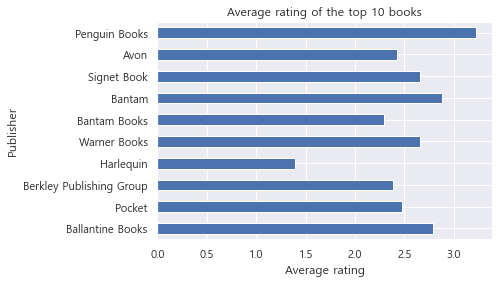

In [26]:
# Publisher 컬럼에서 가장 많이 나온 상위 10개 책 찾기
top_n_books = 10
top_books = train['Publisher'].value_counts().head(top_n_books)

# 각 책의 평균 평점 계산하기
book_ratings = train.groupby('Publisher')['Book-Rating'].mean().loc[top_books.index]

# 결과 출력
print(f'The average rating of the top {top_n_books} books are:\n{book_ratings}')

# 결과 시각화
book_ratings.plot(kind='barh', title=f'Average rating of the top {top_n_books} books')
plt.xlabel('Average rating')
plt.ylabel('Publisher')
plt.show()

The average rating of the top 10 books are:
Ballantine Books            14.584352
Pocket                      13.732458
Berkley Publishing Group    13.103676
Harlequin                    8.812363
Warner Books                14.158069
Bantam Books                12.944220
Bantam                      15.336873
Signet Book                 14.251782
Avon                        13.624706
Penguin Books               15.952379
Name: Book-Rating, dtype: float64


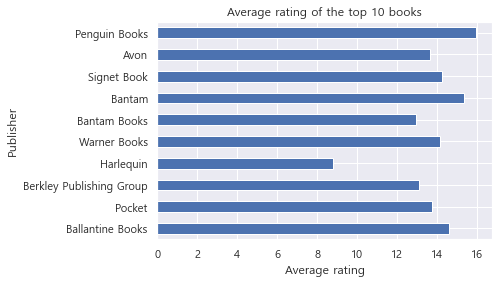

In [27]:
# Publisher 컬럼에서 가장 많이 나온 상위 10개 책 찾기
top_n_books = 10
top_books = train['Publisher'].value_counts().head(top_n_books)

# 각 책의 평균 평점 계산하기
book_ratings = train.groupby('Publisher')['Book-Rating'].var().loc[top_books.index]

# 결과 출력
print(f'The average rating of the top {top_n_books} books are:\n{book_ratings}')

# 결과 시각화
book_ratings.plot(kind='barh', title=f'Average rating of the top {top_n_books} books')
plt.xlabel('Average rating')
plt.ylabel('Publisher')
plt.show()

In [28]:
train[train['Year-Of-Publication']==-1]

,User-ID,Book-ID,Book-Rating,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,city,state,country
184,USER_00049,BOOK_121460,0,37.0,Bxc Blue Bay Mystery,Gertrude Cha Warner,-1.0,Scholastic Inc,gaylord,michigan,usa
186,USER_00049,BOOK_175661,10,37.0,Lighthouse Mystery,Gertrude C Warner,-1.0,Scholastic Inc,gaylord,michigan,usa
191,USER_00049,BOOK_230275,0,37.0,Mike's Mystery,Gertrude Cha Warner,-1.0,Scholastic Inc,gaylord,michigan,usa
231,USER_00054,BOOK_122689,0,39.0,Charming Billy,Alice Mcdermott,-1.0,"Farrar, Straus Giroux",spring,texas,usa
290,USER_00060,BOOK_165427,0,27.0,Moon Palace,Paul Auster,-1.0,Faber Faber Inc,los angeles,california,usa
...,...,...,...,...,...,...,...,...,...,...,...
870700,USER_92056,BOOK_093874,5,35.0,High Ground,John Mcgahern,-1.0,Faber Faber Inc,leucadia,california,usa
870751,USER_92058,BOOK_117063,0,24.0,Hotel Du Lac,Anita Brookner,-1.0,Penguin Putnam~trade,halifax,nova scotia,canada
870776,USER_92058,BOOK_181486,8,24.0,Laurels Kitchen a Handbook for Vegetarian Co,Laurel Robertson,-1.0,Bantam Doubleday Dell,halifax,nova scotia,canada
870895,USER_92080,BOOK_045027,10,35.0,Best of Sisters In Crime,Marilyn Wallace,-1.0,Penguin Putnam~childrens Hc,brookhaven,mississippi,usa


In [29]:
# Year-Of-Publication과 Book-Rating 간의 상관관계 계산
correlation = train['Year-Of-Publication'].corr(train['Book-Rating'])

# 결과 출력
print('Year-Of-Publication과 Book-Rating의 상관관계:', correlation)

Year-Of-Publication과 Book-Rating의 상관관계: -0.007454710012552264


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871393 entries, 0 to 871392
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              871393 non-null  object 
 1   Book-ID              871393 non-null  object 
 2   Book-Rating          871393 non-null  int64  
 3   Age                  871393 non-null  float64
 4   Book-Title           871393 non-null  object 
 5   Book-Author          871393 non-null  object 
 6   Year-Of-Publication  871393 non-null  float64
 7   Publisher            871393 non-null  object 
 8   city                 871393 non-null  object 
 9   state                871393 non-null  object 
 10  country              871393 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 73.1+ MB


In [31]:
train.isnull().sum()

User-ID                0
Book-ID                0
Book-Rating            0
Age                    0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
city                   0
state                  0
country                0
dtype: int64

In [32]:
train

,User-ID,Book-ID,Book-Rating,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,city,state,country
0,USER_00000,BOOK_044368,8,23.0,Road Taken,Rona Jaffe,2001.0,Mira,sackville,new brunswick,canada
1,USER_00000,BOOK_081205,8,23.0,Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books,sackville,new brunswick,canada
2,USER_00000,BOOK_086781,0,23.0,Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books,sackville,new brunswick,canada
3,USER_00000,BOOK_098622,0,23.0,Mother Earth Father Sky,Sue Harrison,1991.0,Avon,sackville,new brunswick,canada
4,USER_00000,BOOK_180810,8,23.0,She Who Remembers,Linda Lay Shuler,1989.0,Signet Book,sackville,new brunswick,canada
...,...,...,...,...,...,...,...,...,...,...,...
871388,USER_92096,BOOK_081138,0,34.0,Healing Words: The Power of Prayer and the Pra...,Larry Dossey,1993.0,Harpercollins,minneapolis,minnesota,usa
871389,USER_92097,BOOK_258124,0,35.0,The Salmon of Doubt: Hitchhiking the Galaxy On...,DOUGLAS ADAMS,2002.0,Harmony,temple,texas,usa
871390,USER_92098,BOOK_071848,0,45.0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2000.0,Thorndike Press,ottawa,ontario,canada
871391,USER_92099,BOOK_252599,8,43.0,Heartbreak Hill: Anatomy of a Ryder Cup,Tim Rosaforte,1996.0,St Martins Pr,maple grove,minnesota,usa


In [33]:
from catboost import CatBoostRegressor, Pool

# 범주형 변수 목록
categorical_features = ['User-ID','Book-ID','Book-Title', 'Book-Author', 'city','Publisher','state','country']

# train 데이터를 CatBoost 데이터 포맷으로 변환
train_pool = Pool(train.drop(['Book-Rating','Age','Year-Of-Publication'], axis=1), 
                  label=train['Book-Rating'], 
                  cat_features=categorical_features,
                  )

# 모델 학습
model = CatBoostRegressor(iterations=1000,
                           learning_rate=0.05,
                           depth=10,
                           eval_metric='RMSE',
                           random_seed=42
                           )

model.fit(train_pool)





0:	learn: 3.8079231	total: 691ms	remaining: 11m 30s
1:	learn: 3.7729421	total: 1.21s	remaining: 10m 3s
2:	learn: 3.7404648	total: 1.77s	remaining: 9m 49s
3:	learn: 3.7106444	total: 2.18s	remaining: 9m 1s
4:	learn: 3.6835485	total: 2.41s	remaining: 7m 58s
5:	learn: 3.6588273	total: 2.77s	remaining: 7m 39s
6:	learn: 3.6363111	total: 3.03s	remaining: 7m 10s
7:	learn: 3.6152408	total: 3.54s	remaining: 7m 18s
8:	learn: 3.5959232	total: 3.89s	remaining: 7m 8s
9:	learn: 3.5784872	total: 4.28s	remaining: 7m 4s
10:	learn: 3.5625621	total: 4.7s	remaining: 7m 2s
11:	learn: 3.5479951	total: 4.98s	remaining: 6m 50s
12:	learn: 3.5347186	total: 5.27s	remaining: 6m 39s
13:	learn: 3.5229556	total: 5.54s	remaining: 6m 30s
14:	learn: 3.5122662	total: 5.83s	remaining: 6m 22s
15:	learn: 3.5024177	total: 6.1s	remaining: 6m 15s
16:	learn: 3.4933341	total: 6.39s	remaining: 6m 9s
17:	learn: 3.4852287	total: 6.83s	remaining: 6m 12s
18:	learn: 3.4779045	total: 7.32s	remaining: 6m 17s
19:	learn: 3.4712476	total: 

In [34]:
test_location_split = test['Location'].str.split(',', expand=True).apply(lambda x: x.str.strip())
test_location_split = location_split.iloc[:, :3]
test[['city', 'state', 'country']]=test_location_split

In [35]:
test.loc[test['country'].str.contains('n/a|N/A'), 'country'] = 'n/a'
test['country'].fillna('n/a', inplace=True)
test['country'].replace('', 'n/a', inplace=True)

test.loc[train['state'].str.contains('n/a|N/A'), 'state'] = 'n/a'
test['state'].fillna('n/a', inplace=True)
test['state'].replace('', 'n/a', inplace=True)

test.loc[train['city'].str.contains('n/a|N/A'), 'city'] = 'n/a'
test['city'].fillna('n/a', inplace=True)
test['city'].replace('', 'n/a', inplace=True)

test.drop('Location',axis=1,inplace=True)
test.drop('ID',axis=1,inplace=True)

In [38]:
# test 데이터 예측
test_pool = Pool(test.drop(['Age','Year-Of-Publication'], axis=1), 
                 cat_features=categorical_features,
                 )

preds = model.predict(test_pool)
preds=np.round(preds)
# 예측값 출력
print(preds)


[5. 6. 6. ... 3. 4. 5.]


In [39]:
submission=pd.read_csv('sample_submission.csv')

In [40]:
submission['Book-Rating']=preds

In [41]:
submission.to_csv('submission.csv', index=False)